# Problem statement: 
Understand distribution of crime episodes in Los Angeles over three years.

# Dataset: 
The information that is being supplied includes crime episodes that have occurred in the City of Los Angeles since 2020. It comes from the original handwritten crime reports that were copied from paper records. Dataset includes details of reported crime with dates, area and victims
We have considered the crime episodes for the years 2021, 2022 and 2023 for our analysis. The dataset contained some errors which have been cleaned by us before being used for analysis.

# PseudoCode 
1.Import Libraries: Load pandas, seaborn, and matplotlib for data manipulation and visualization.

2.Load Dataset: Read the crime data CSV file into a DataFrame.

3.Convert Date Format: Change the 'DATE OCC' column to datetime format for analysis.

4.Filter Data: Select records from the years 2021, 2022, and 2023.

5.Save Filtered Data: Write the filtered dataset to a new CSV file.

6.Clean Data: Remove rows with missing values in 'Vict Age' or 'Vict Sex' and convert 'Vict Age' to numeric.

7.Create Age Groups: Categorize 'Vict Age' into predefined bins and create an 'Age Group' column.

8.Analyze Crime Trends: Group data by crime type, year, and month to count occurrences and visualize with bar plots.

9.Count Crimes by Area: Aggregate crime data by area and plot the number of crimes per area.

10.Visualize Common Crimes and Weapons: Identify and plot the most common crimes and weapons used in the dataset.

In [12]:
import pandas as pd

# Load the dataset
df1 = pd.read_csv('Crime_Data_from_2020_to_Present.csv')


In [13]:
# Convert the 'DATE OCC' column to datetime format (handling both date and time)
df1['DATE OCC'] = pd.to_datetime(df1['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

# Filter the data for the years 2021, 2022, and 2023
filtered_df = df1[df1['DATE OCC'].dt.year.isin([2021, 2022, 2023])]

# Display or save the filtered dataset
filtered_df.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
876629,231606525,03/22/2023 12:00:00 AM,2023-03-22,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
876630,231716047,10/02/2023 12:00:00 AM,2023-09-25,2200,17,Devonshire,1798,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,8800 HASKELL AV,NaN,34.2302,-118.4764
876631,230115220,07/02/2023 12:00:00 AM,2023-07-01,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
876632,230906458,03/05/2023 12:00:00 AM,2023-03-05,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487
876633,230319786,11/10/2023 12:00:00 AM,2023-11-09,2300,3,Southwest,395,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,4100 S HOBART BL,NaN,34.0091,-118.3078


In [14]:
# Example to save the filtered data to a new CSV file
filtered_df.to_csv('filtered_crime_data.csv', index=False)

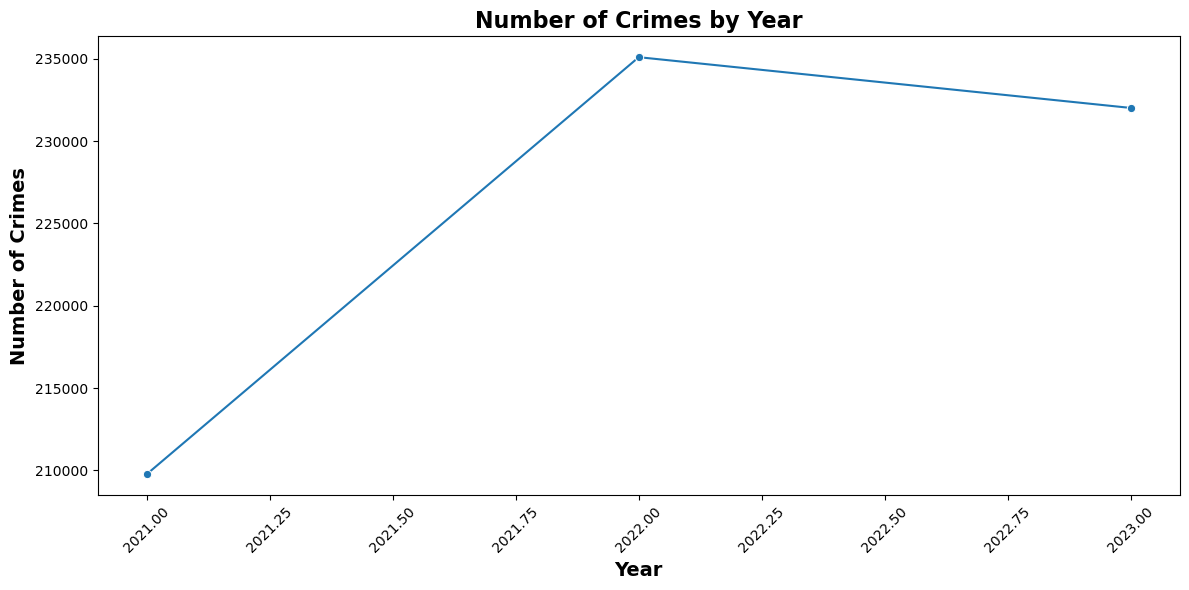

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('filtered_crime_data.csv')  # Replace with your actual file path

# Convert the date column to datetime format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

# Extract the year from the 'DATE OCC' column
df['Crime Year'] = df['DATE OCC'].dt.year

# Filter out rows where 'Crime Year' is missing
df_filtered = df.dropna(subset=['Crime Year']).copy()

# Aggregate data to find the number of crimes per year
crime_count_by_year = df_filtered.groupby('Crime Year')['Crime Year'].count().reset_index(name='Number of Crimes')

# Set up the plot
plt.figure(figsize=(12, 6))

# Create a line plot
sns.lineplot(x='Crime Year', y='Number of Crimes', data=crime_count_by_year, marker='o', color='#1f77b4')

# Add titles and labels
plt.title('Number of Crimes by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Crimes', fontsize=14, fontweight='bold')

# Improve layout and display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


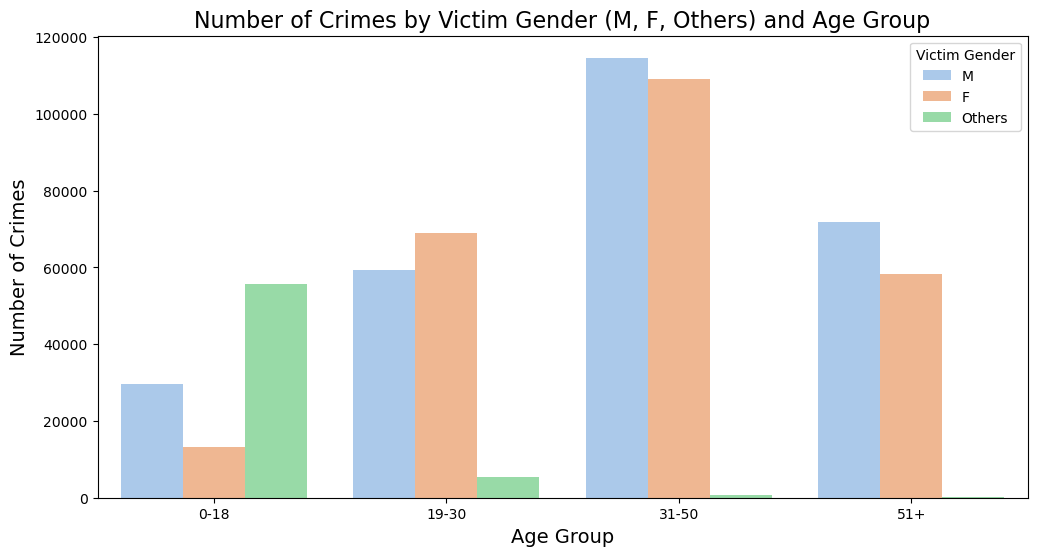

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('filtered_crime_data.csv')  # Replace with your actual file path

# Filter out rows where Victim Age or Victim Gender might be missing, creating a copy
df_filtered = df.dropna(subset=['Vict Age', 'Vict Sex']).copy()

# Convert Victim Age to numeric
df_filtered['Vict Age'] = pd.to_numeric(df_filtered['Vict Age'], errors='coerce')

# Define age bins and labels
bins = [0, 18, 30, 50, float('inf')]
labels = ['0-18', '19-30', '31-50', '51+']

# Create a new column for age categories
df_filtered['Age Group'] = pd.cut(df_filtered['Vict Age'], bins=bins, labels=labels, right=False)

# Group the Victim Gender into M, F, and Others
df_filtered['Vict Sex Grouped'] = df_filtered['Vict Sex'].apply(lambda x: 'M' if x == 'M' 
                                                                else 'F' if x == 'F' 
                                                                else 'Others')

# Aggregate data to find the number of crimes for each gender within each age group
crime_count_by_group = df_filtered.groupby(['Age Group', 'Vict Sex Grouped'], observed=False)['Vict Age'].count().reset_index(name='Number of Crimes')

# Set up the plot
plt.figure(figsize=(12, 6))

# Create a bar plot to show the number of crimes by gender and age group, specifying the order of the gender categories
sns.barplot(x='Age Group', y='Number of Crimes', hue='Vict Sex Grouped', data=crime_count_by_group, 
            palette='pastel', hue_order=['M', 'F', 'Others'])

# Add titles and labels
plt.title('Number of Crimes by Victim Gender (M, F, Others) and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)

# Show the plot
plt.legend(title='Victim Gender')
plt.show()



<Figure size 1400x800 with 0 Axes>

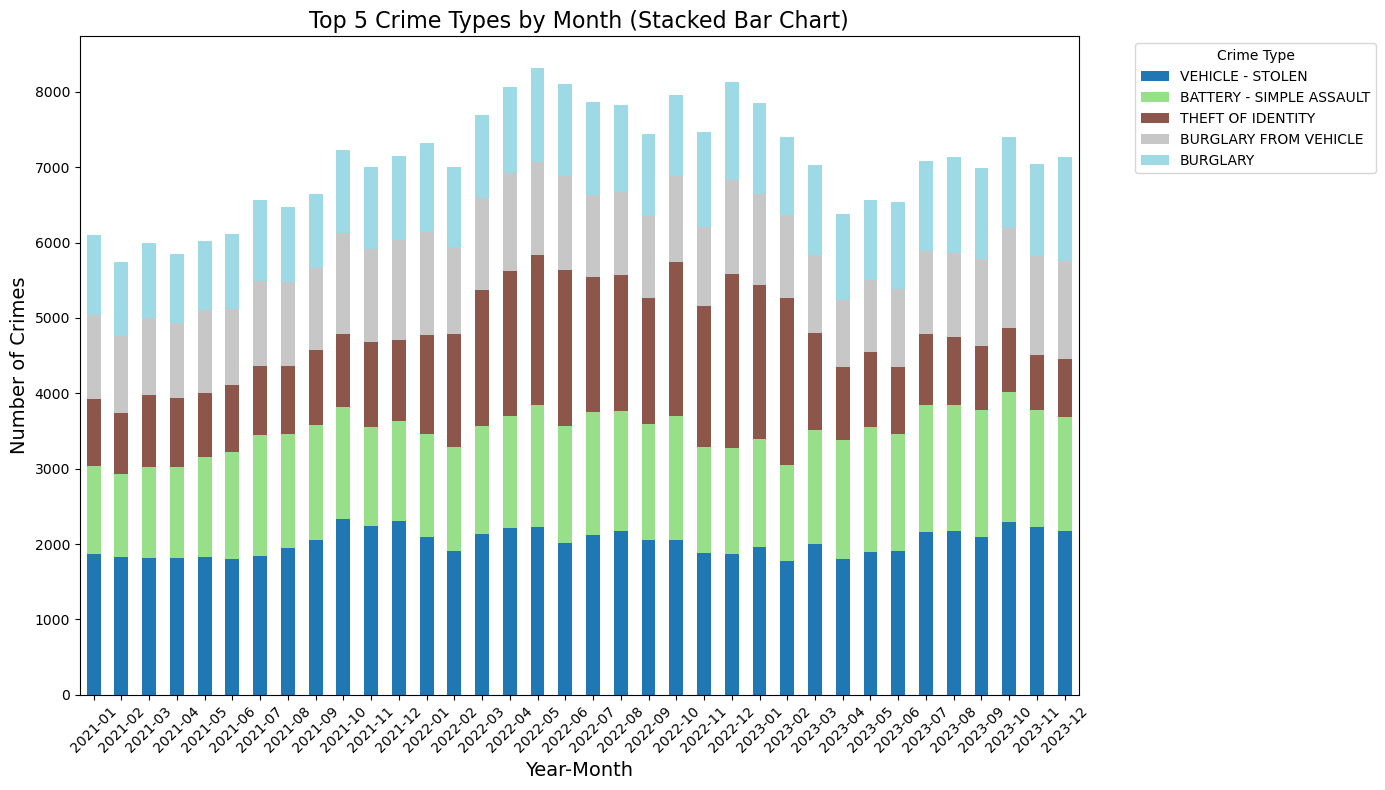

In [6]:


# Convert the 'DATE OCC' column to datetime if it's not already
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

# Extract the month and year from the 'DATE OCC' column
df['Month'] = df['DATE OCC'].dt.month
df['Year'] = df['DATE OCC'].dt.year

# Group the data by 'TYPE OF CRIME', 'Year', and 'Month'
crime_by_month = df.groupby(['Crm Cd Desc', 'Year', 'Month']).size().reset_index(name='Count')

# Create a new column that combines 'Year' and 'Month' for better plotting (e.g., "2021-01", "2022-02")
crime_by_month['Year-Month'] = crime_by_month['Year'].astype(str) + '-' + crime_by_month['Month'].astype(str).str.zfill(2)

# Pivot the data to have 'Year-Month' on x-axis and 'Type of Crime' as columns with counts filled in
crime_pivot = crime_by_month.pivot_table(index='Year-Month', columns='Crm Cd Desc', values='Count', fill_value=0)

# Select the top 5 crime types (adjust as necessary)
top_5_crime_types = df['Crm Cd Desc'].value_counts().nlargest(5).index

# Filter the data for only the top 5 crime types
filtered_crime_pivot = crime_pivot[top_5_crime_types]

# Set the plot size
plt.figure(figsize=(14, 8))

# Plot the stacked bar chart
filtered_crime_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Add title and labels
plt.title('Top 5 Crime Types by Month (Stacked Bar Chart)', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('filtered_crime_data.csv')

# Group by area name and count crimes
crime_counts_per_area = df.groupby('AREA NAME').size().sort_values(ascending=False)

# Display the top areas with the highest number of crimes
print(crime_counts_per_area.head(10))


AREA NAME
Central        47832
77th Street    41591
Pacific        39732
Southwest      37922
Hollywood      36083
Olympic        34620
Newton         33767
N Hollywood    33655
Southeast      33459
Wilshire       32608
dtype: int64


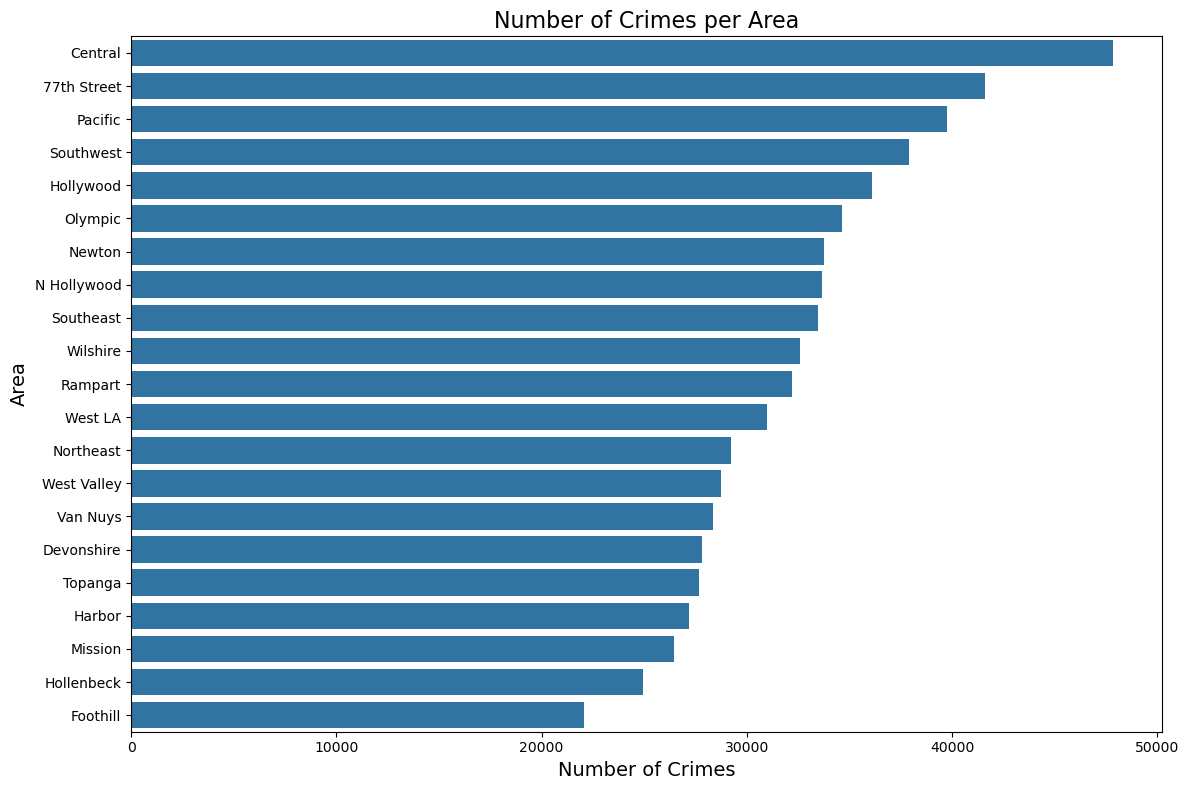

In [8]:
crime_counts_per_area = df.groupby('AREA NAME').size().sort_values(ascending=False)

# Set plot size
plt.figure(figsize=(12, 8))

# Create barplot without using palette (to avoid the warning)
sns.barplot(x=crime_counts_per_area.values, y=crime_counts_per_area.index)

# Add title and labels
plt.title('Number of Crimes per Area', fontsize=16)
plt.xlabel('Number of Crimes', fontsize=14)
plt.ylabel('Area', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
# Group by area name and crime description, then count occurrences
common_crimes_per_area = df.groupby(['AREA NAME', 'Crm Cd Desc']).size().reset_index(name='Count')

# Sort the values for each area by the number of crimes
common_crimes_per_area_sorted = common_crimes_per_area.sort_values(by=['AREA NAME', 'Count'], ascending=[True, False])

# Show the most common crime for each area
most_common_crime = common_crimes_per_area_sorted.groupby('AREA NAME').first()

print(most_common_crime)


                          Crm Cd Desc  Count
AREA NAME                                   
77th Street          VEHICLE - STOLEN   5628
Central         BURGLARY FROM VEHICLE   7048
Devonshire                   BURGLARY   2608
Foothill             VEHICLE - STOLEN   2684
Harbor               VEHICLE - STOLEN   3916
Hollenbeck           VEHICLE - STOLEN   3808
Hollywood    BATTERY - SIMPLE ASSAULT   3313
Mission              VEHICLE - STOLEN   3578
N Hollywood          VEHICLE - STOLEN   3061
Newton               VEHICLE - STOLEN   5241
Northeast            VEHICLE - STOLEN   3388
Olympic              VEHICLE - STOLEN   3873
Pacific              VEHICLE - STOLEN   4294
Rampart              VEHICLE - STOLEN   3501
Southeast            VEHICLE - STOLEN   4635
Southwest            VEHICLE - STOLEN   4266
Topanga             THEFT OF IDENTITY   2379
Van Nuys             VEHICLE - STOLEN   2809
West LA                      BURGLARY   3076
West Valley          VEHICLE - STOLEN   2716
Wilshire  

<Figure size 1200x800 with 0 Axes>

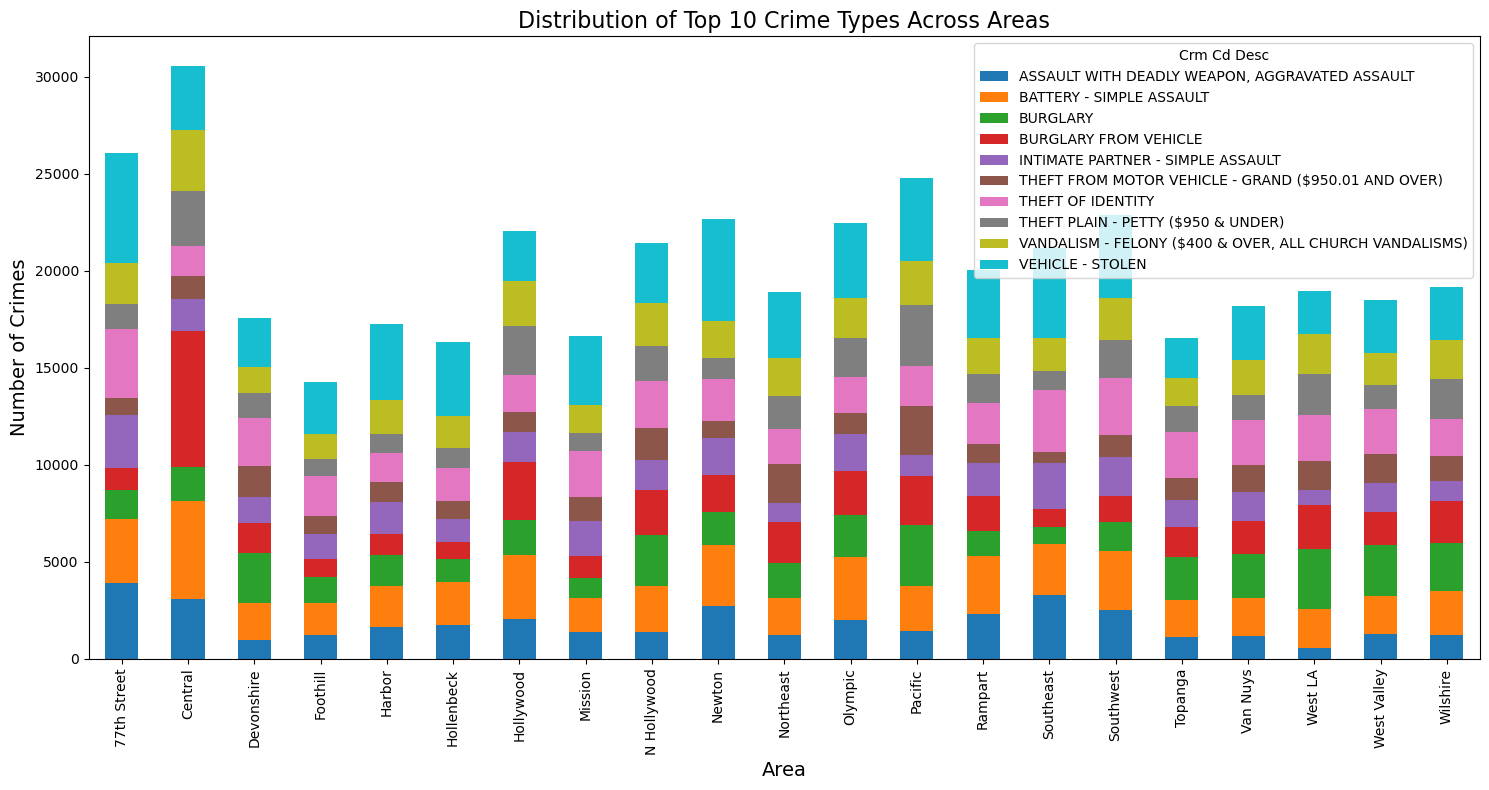

In [10]:
# Group by crime type and count occurrences to find top 10 most common crime types
top_10_crimes = df['Crm Cd Desc'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 crime types
filtered_df = df[df['Crm Cd Desc'].isin(top_10_crimes)]

# Group by area and type of crime, and count the occurrences
crime_distribution = filtered_df.groupby(['AREA NAME', 'Crm Cd Desc']).size().unstack(fill_value=0)

# Set plot size
plt.figure(figsize=(12, 8))

# Plot a stacked bar chart
crime_distribution.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab10')

# Add title and labels
plt.title('Distribution of Top 10 Crime Types Across Areas', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

                                      Weapon Desc  Number of Crimes
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)            123227
1                     UNKNOWN WEAPON/OTHER WEAPON             24672
2                                   VERBAL THREAT             16996
3                                        HAND GUN             14757
4                           SEMI-AUTOMATIC PISTOL              5215
5                KNIFE WITH BLADE 6INCHES OR LESS              4870
6                                 UNKNOWN FIREARM              4708
7                                     OTHER KNIFE              4207
8                               MACE/PEPPER SPRAY              2828
9                                         VEHICLE              2301


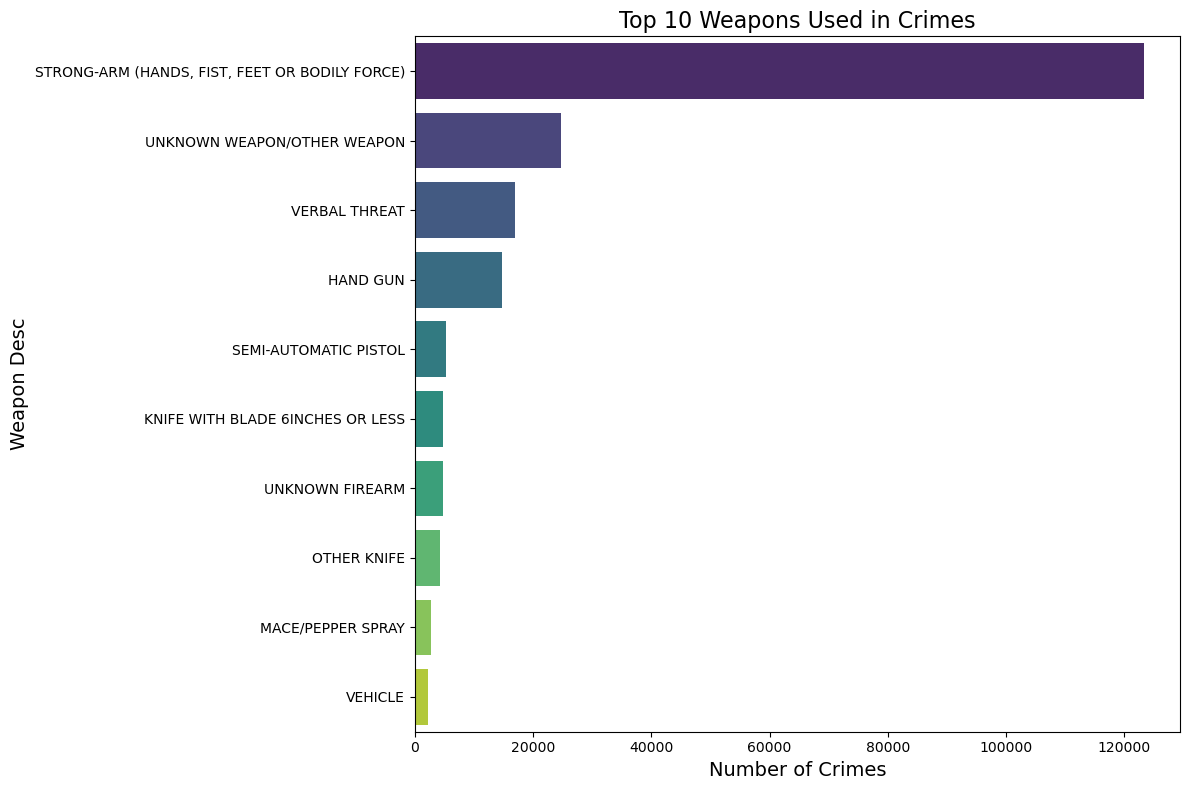

In [11]:
# Group by weapon description and count occurrences to find top 10 most common weapons used
top_10_weapons = df['Weapon Desc'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 weapons used
filtered_weapons_df = df[df['Weapon Desc'].isin(top_10_weapons)]

# Group by weapon type and count occurrences
weapon_counts = filtered_weapons_df['Weapon Desc'].value_counts()

# Create a DataFrame for the weapon counts
weapon_counts_df = pd.DataFrame(weapon_counts).reset_index()
weapon_counts_df.columns = ['Weapon Desc', 'Number of Crimes']

# Display the table
print(weapon_counts_df)

# Set plot size
plt.figure(figsize=(12, 8))

# Create a new DataFrame for seaborn
plot_data = pd.DataFrame({'Weapon': weapon_counts.index, 'Count': weapon_counts.values})

# Create a barplot for the top 10 weapons used
sns.barplot(data=plot_data, x='Count', y='Weapon', palette='viridis', hue='Weapon', dodge=False)

# Add title and labels
plt.title('Top 10 Weapons Used in Crimes', fontsize=16)
plt.xlabel('Number of Crimes', fontsize=14)
plt.ylabel('Weapon Desc', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

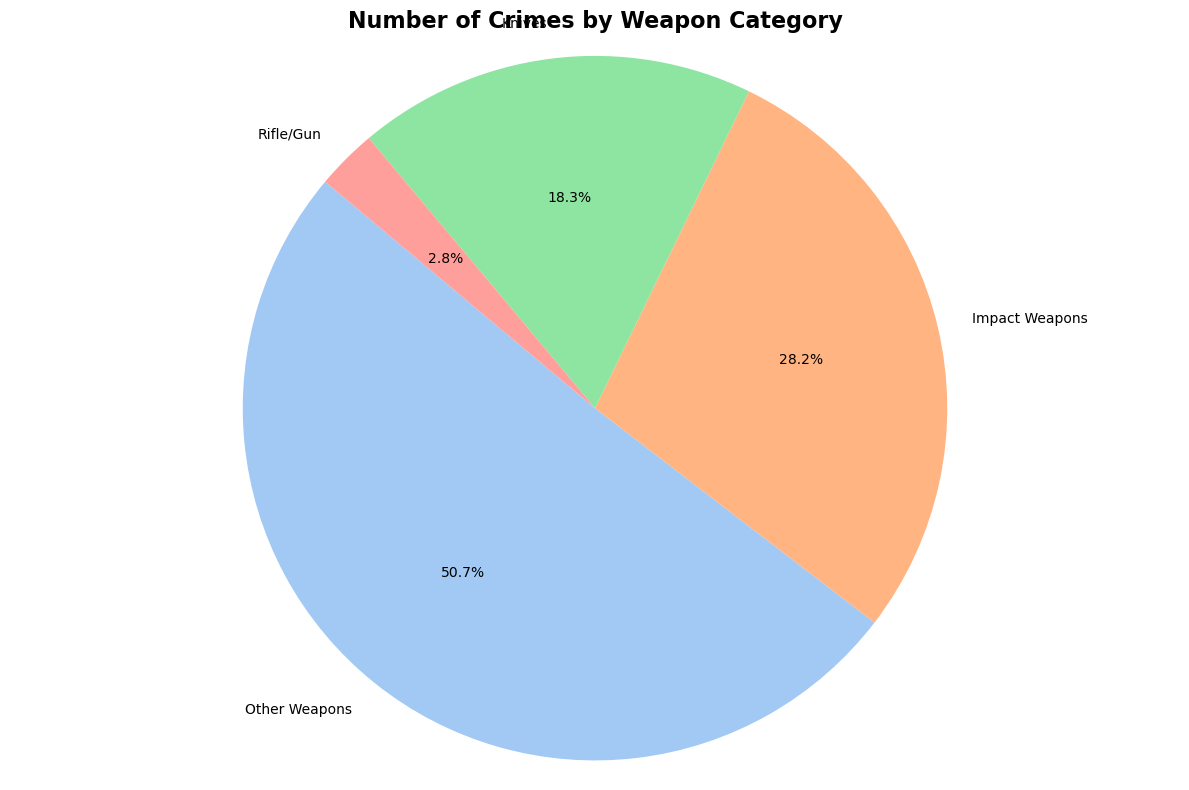

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('filtered_crime_data.csv')  # Replace with your actual file path

# Define a function to categorize weapons based on 'Crm Cd'
def categorize_weapons(crm_cd):
    if 100 <= crm_cd <= 130:
        return 'Rifle/Gun'
    elif 200 <= crm_cd <= 225:
        return 'Knives'
    elif 300 <= crm_cd <= 313:
        return 'Impact Weapons'
    elif 399 <= crm_cd <= 401:
        return 'Physical Force'
    elif 500 <= crm_cd <= 517:
        return 'Other Weapons'
    else:
        return 'Unknown'

# Create a new column in the DataFrame for weapon categories
df['Weapon Category'] = df['Crm Cd'].apply(categorize_weapons)

# Filter out unknown and null values
filtered_df = df[(df['Weapon Category'] != 'Unknown') & (df['Weapon Category'].notnull())]

# Group by weapon category and count occurrences
weapon_counts = filtered_df['Weapon Category'].value_counts()

# Create a DataFrame for the weapon counts
weapon_counts_df = pd.DataFrame(weapon_counts).reset_index()
weapon_counts_df.columns = ['Weapon Category', 'Number of Crimes']

# Set plot size
plt.figure(figsize=(12, 8))

# Create a pie chart
plt.pie(weapon_counts_df['Number of Crimes'], labels=weapon_counts_df['Weapon Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

# Add title
plt.title('Number of Crimes by Weapon Category', fontsize=16, fontweight='bold')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


Limitations: Underreporting, especially of domestic violence and sexual assault, along with potential data errors from handwritten reports, complicates the analysis of crime trends and may mask true crime levels over time.


Interpretation: As can be seen from above visualisation codes,

Males and adults between the age group of 31-50 are more prone to to be victims of crime.

In Los Angeles, the most prevalent crime types are Vehicle Theft, with 44,159 incidents; Simple Assault, with 32,817 incidents; and Identity Theft, totalling 26,777 incidents.

The Central area leads Los Angeles in crime with 26,996 incidents, followed by the 77th Street area at 25,147. Foothill has the lowest crime rate, with just 13,427 incidents.

Strong-arm tactics lead the way with 70,535 incidents involving physical force. Following closely are 14,667 cases categorized as 'Unknown/Other Weapon,' and 10,382 incidents where verbal threats were employed.

Team Contribution:

1.Aishwarya Rai - 25% contribution with Python coding, designing poster and interpretation of outcome.

2.Nikhil Nolastname - 25% contribution with Python coding, creating content for poster and interpretation of outcome.

3.Garima Astha - 25% contribution with Python coding, creating content for poster and interpretation of outcome.

4.Aakash Malhan - 25% contribution with Python coding, designing poster and interpretation of outcome.